<a href="https://www.kaggle.com/code/iozdemir/melbourne-housing-market-data-analysis?scriptVersionId=209389165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Melbourne Housing Market || Data Analysis**

![](https://storage.googleapis.com/kaggle-datasets-images/423/882/852dacdbc4afbe97e5367795ad6606bd/dataset-cover.jpg)

## Global AI Hub

Global AI Hub is one of the globally leading AI communities with reach to young AI talents, AI professionals, experts and AI enthusiast around the world.

(https://www.globalaihub.com/ || https://10million.ai/)

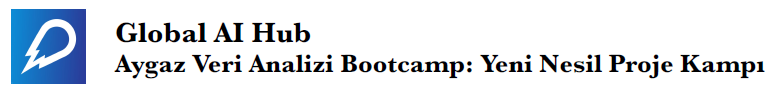

### Final Project of Bootcamp

**Definition :** 
This study is a graduation project organized for the Aygaz data analysis bootcamp (new generation project camp) carried out by the Global AI Hub.

**Project Scope :**
* Dataset selection
* Development Environments (Kaggle & Github)
* Exploratory Data Analysis (EDA)
* Data Cleaning and Preprocessing
* Statistical Analysis & Visualization
* Conclusion and Recommendations

## Introduction

### Data Set Information :

This is a dataset that contains sales data for houses in Melbourne. This dataset provides various features to estimate or analyze house prices. The dataset consists of rows that contain various features and sales conditions for each house.

Here are the main features:

**House Prices (Price):** The sales price of each house (**target variable**).

**House Features:** Features such as house type (apartment or house), number of rooms, number of bathrooms, number of bedrooms, vehicle capacity.

**Location:** The neighborhood (Suburb) where the houses are located, address and postcode.

**Building and Land Features:** Information such as building area, lot size, year of construction.

**Sales Method:** The method of the sales transaction (e.g. auction, direct sale).

**Seller and Local Government:** Sellers of houses and local government areas.



**Dataset Link :** https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

## Libraries

In [125]:
# for data analysis
import numpy as np
import pandas as pd
import random

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# accessing directory structure
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# for disable all alerts
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# For data optimization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


##### Note : There are 2 csv files in the current version of the dataset. I chose the dataset with the largest data size, which is "Melbourne_House_prices_less".

In [126]:
data = pd.read_csv("/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv")

## Exploratory Data Analysis [EDA]

### 1. First Informations

In [127]:
data.shape # Dimension of dataset

(63023, 13)

In [128]:
print(data.columns) # Columns of data set

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')


**Dataset Columns Descriptions :**

**1. Suburb:** The name of the suburb where the house is located. This is a categorical variable representing different suburbs in Melbourne. 

**2. Address:** The full address of the house. This column provides the exact address of the property, but is often used together with other general location information like suburb name and postcode.

**3. Rooms:** The number of rooms in the house. This is a numerical variable that indicates the total number of rooms in the house.

**4. Type:** The type of property. This categorical variable indicates the type of dwelling (e.g., 'h' = house, 'u' = unit).

**5. Price:** The sale price of the house. This is the target variable, representing the price at which the house was sold.

**6. Method:** The method of sale. This categorical variable describes how the house was sold (e.g., 'S' = sold, 'SP' = sold via a private sale).

**7. SellerG:** The name of the real estate agent or group that sold the property. This column refers to the seller or the agency responsible for the sale.

**8. Date:** The sale date of the house. This column indicates the date on which the house was sold, typically in a date format.

**9. Postcode:** The postcode of the location where the house is situated. This is a numerical variable that further specifies the location of the house.

**10. Regionname:** The name of the region. This categorical variable indicates the broader geographic region in Melbourne in which the property is located.

**11. Propertycount:** The total number of properties in the suburb. This variable indicates how many properties are present in the particular suburb, which can help analyze property density and market saturation.

**12. Distance:** The distance of the house from the central Melbourne area. This numerical variable shows how far the house is from the city center, typically in kilometers.

**13. CouncilArea:** The local government area. This column indicates the local council or municipality that governs the area where the property is located. 

In [129]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

### 2. Creating Artificially Missing Values ​​in a Data Set

In [130]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random = 28) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

In [131]:
df = add_random_missing_values(dataframe = data,missing_rate = 0.03)

### 3. Exploratory Analysis

In [132]:
df.head(5) # first 5 records

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3.0,h,NaN,S,Jellis,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3.0,h,1220000.0,S,Marshall,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3.0,h,1420000.0,S,Nelson,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3.0,h,1515000.0,S,Barry,NaN,3040.0,Western Metropolitan,1543.0,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2.0,NaN,670000.0,S,Nelson,1/04/2017,3042.0,Western Metropolitan,3464.0,10.4,Moonee Valley City Council


In [133]:
df.tail(5) # last 5 records

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
63018,Roxburgh Park,3 Carr Pl,3.0,h,566000.0,S,Raine,31/03/2018,3064.0,Northern Metropolitan,5833.0,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3.0,h,500000.0,S,Raine,31/03/2018,3064.0,Northern Metropolitan,5833.0,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3.0,h,NaN,S,Raine,31/03/2018,3064.0,Northern Metropolitan,5833.0,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3.0,u,NaN,PI,Barry,31/03/2018,3074.0,Northern Metropolitan,7955.0,15.3,Whittlesea City Council
63022,Williams Landing,1 Diadem Wy,4.0,h,NaN,SP,Aussie,31/03/2018,3027.0,Western Metropolitan,1999.0,17.6,Wyndham City Council


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         61149 non-null  object 
 1   Address        61195 non-null  object 
 2   Rooms          61157 non-null  float64
 3   Type           61139 non-null  object 
 4   Price          47034 non-null  float64
 5   Method         61140 non-null  object 
 6   SellerG        61138 non-null  object 
 7   Date           61177 non-null  object 
 8   Postcode       61155 non-null  float64
 9   Regionname     61180 non-null  object 
 10  Propertycount  61171 non-null  float64
 11  Distance       61176 non-null  float64
 12  CouncilArea    61122 non-null  object 
dtypes: float64(5), object(8)
memory usage: 6.3+ MB


### 4. Data Types

**Note : Why should we convert to data type from object to category or string?**

**1. Memory Efficiency :** If the same text (such as neighborhood name or house type) is repeated many times in an object type column, converting this column to category data type allows you to use memory much more efficiently. Category data type stores unique values ​​(labels) in the column in a separate place and uses a numeric code corresponding to these unique values ​​in each repetition. In this way, instead of storing all the text, only a numeric value is stored in each row, which reduces memory usage.

**2. Performance Increase :** category data type performs operations such as grouping, sorting, filtering faster. Pandas works faster by optimizing operations performed with categorical data.

**3. Meaningful Data Representation :** If the column represents categorical data (such as neighborhood name, house type, sales method), converting it to category data type provides a more accurate representation of the data. This shows that the data represents a limited and specific set and clarifies the meaning of the data type.If the column represents categorical data (such as neighborhood name, house type, sales method), converting it to category data type provides a more accurate representation of the data. This shows that the data represents a limited and specific set and clarifies the meaning of the data type.

**4. Text Operations :** If the data is entirely text (string) (e.g. addresses, vendor names), using the string data type instead of object will provide more consistent and accurate results when performing text operations.

In [135]:
df1 = df.copy() # let's create a copy for this step.

In [136]:
def convert_data_type(p_data):
    # Detect all columns of type object in the dataset
    for column in p_data.select_dtypes(include=['object']).columns:
        # If the column contains categorical data, convert it to 'category' type
        if p_data[column].nunique() < p_data[column].shape[0] * 0.5:
            p_data[column] = p_data[column].astype('category')
        else:
            # If column is not categorical, convert to 'string' type
            p_data[column] = p_data[column].astype('string')
    return p_data

In [137]:
df1 = convert_data_type(df1)

In [138]:
df1.dtypes

Suburb                 category
Address          string[python]
Rooms                   float64
Type                   category
Price                   float64
Method                 category
SellerG                category
Date                   category
Postcode                float64
Regionname             category
Propertycount           float64
Distance                float64
CouncilArea            category
dtype: object

In [139]:
categorical_features = []
text_features = []
numerical_features = []

for col in df1.columns:
    if (df1[col].dtype == "category"):
        categorical_features.append(col)
    elif (df1[col].dtype == "string"):
        text_features.append(col)
    else:
        numerical_features.append(col)

In [140]:
print(f"Categorical Features : {categorical_features} ")
print(f"Text Features : {text_features} ")
print(f"Numerical Features : {numerical_features} ")

Categorical Features : ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'Regionname', 'CouncilArea'] 
Text Features : ['Address'] 
Numerical Features : ['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance'] 


### 5.Analysis of Missing Data

##### Note : By analyzing missing data, we aim to detect missing data in the data set and correct this situation appropriately.

In [141]:
df2 = df1.copy() # let's create a copy for this step.

In [142]:
df2.isna().sum() # number of missing values ​​for each variable

Suburb            1874
Address           1828
Rooms             1866
Type              1884
Price            15989
Method            1883
SellerG           1885
Date              1846
Postcode          1868
Regionname        1843
Propertycount     1852
Distance          1847
CouncilArea       1901
dtype: int64

In [143]:
df2.isna().sum().sum() # total number of missing values

38366

In [144]:
# The ratio of the missing values ​​of each variable to the total number of missing values
round((df2.isna().sum() / df2.isna().sum().sum())*100,2) 

Suburb            4.88
Address           4.76
Rooms             4.86
Type              4.91
Price            41.67
Method            4.91
SellerG           4.91
Date              4.81
Postcode          4.87
Regionname        4.80
Propertycount     4.83
Distance          4.81
CouncilArea       4.95
dtype: float64

In [145]:
print(f"There are a total of {df2.notnull().sum().sum()} non-missing and {df2.isnull().sum().sum()} missing observations in the data set.")

There are a total of 780933 non-missing and 38366 missing observations in the data set.


### 6.Filling in Missing Data

In [146]:
df3 = df2.copy() # let's create a copy for this step.

#### Numerical Data Filling

In [147]:
print(numerical_features)

['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance']


In [148]:
to_be_filled = numerical_features[:]

for col in to_be_filled:
    df3[col].fillna(df2[col].mean(), inplace = True)

In [149]:
df3.isna().sum()

Suburb           1874
Address          1828
Rooms               0
Type             1884
Price               0
Method           1883
SellerG          1885
Date             1846
Postcode            0
Regionname       1843
Propertycount       0
Distance            0
CouncilArea      1901
dtype: int64

#### Categorical Data Filling

In [150]:
df4 = df3.copy()

In [151]:
print(categorical_features)

['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'Regionname', 'CouncilArea']


In [152]:
to_be_filled = categorical_features[:]

for col in to_be_filled:
    col_mode = df4[col].mode()
    df4[col] = df4[col].fillna(value = col_mode[0])

In [153]:
df4.isna().sum()

Suburb              0
Address          1828
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Postcode            0
Regionname          0
Propertycount       0
Distance            0
CouncilArea         0
dtype: int64

#### Text Data Filling

In [154]:
df5 = df4.copy()

In [155]:
df5['Address'] = np.where(df5['Address'].isna(), df5['Regionname'], df5['Address'])

In [156]:
df5.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

### 7. Data Visiualization

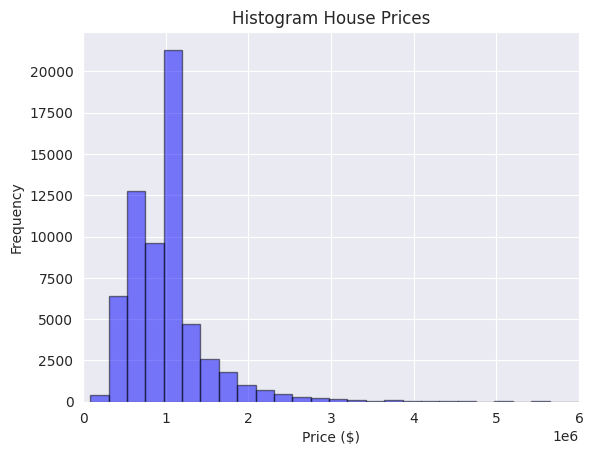

In [157]:
num_bins = 50
n, bins, patches = plt.hist(df5.Price, num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('Price ($)')
plt.xlim([0, 6000000])
plt.title ('Histogram House Prices')
plt.show()

In [158]:
print(numerical_features)

['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance']


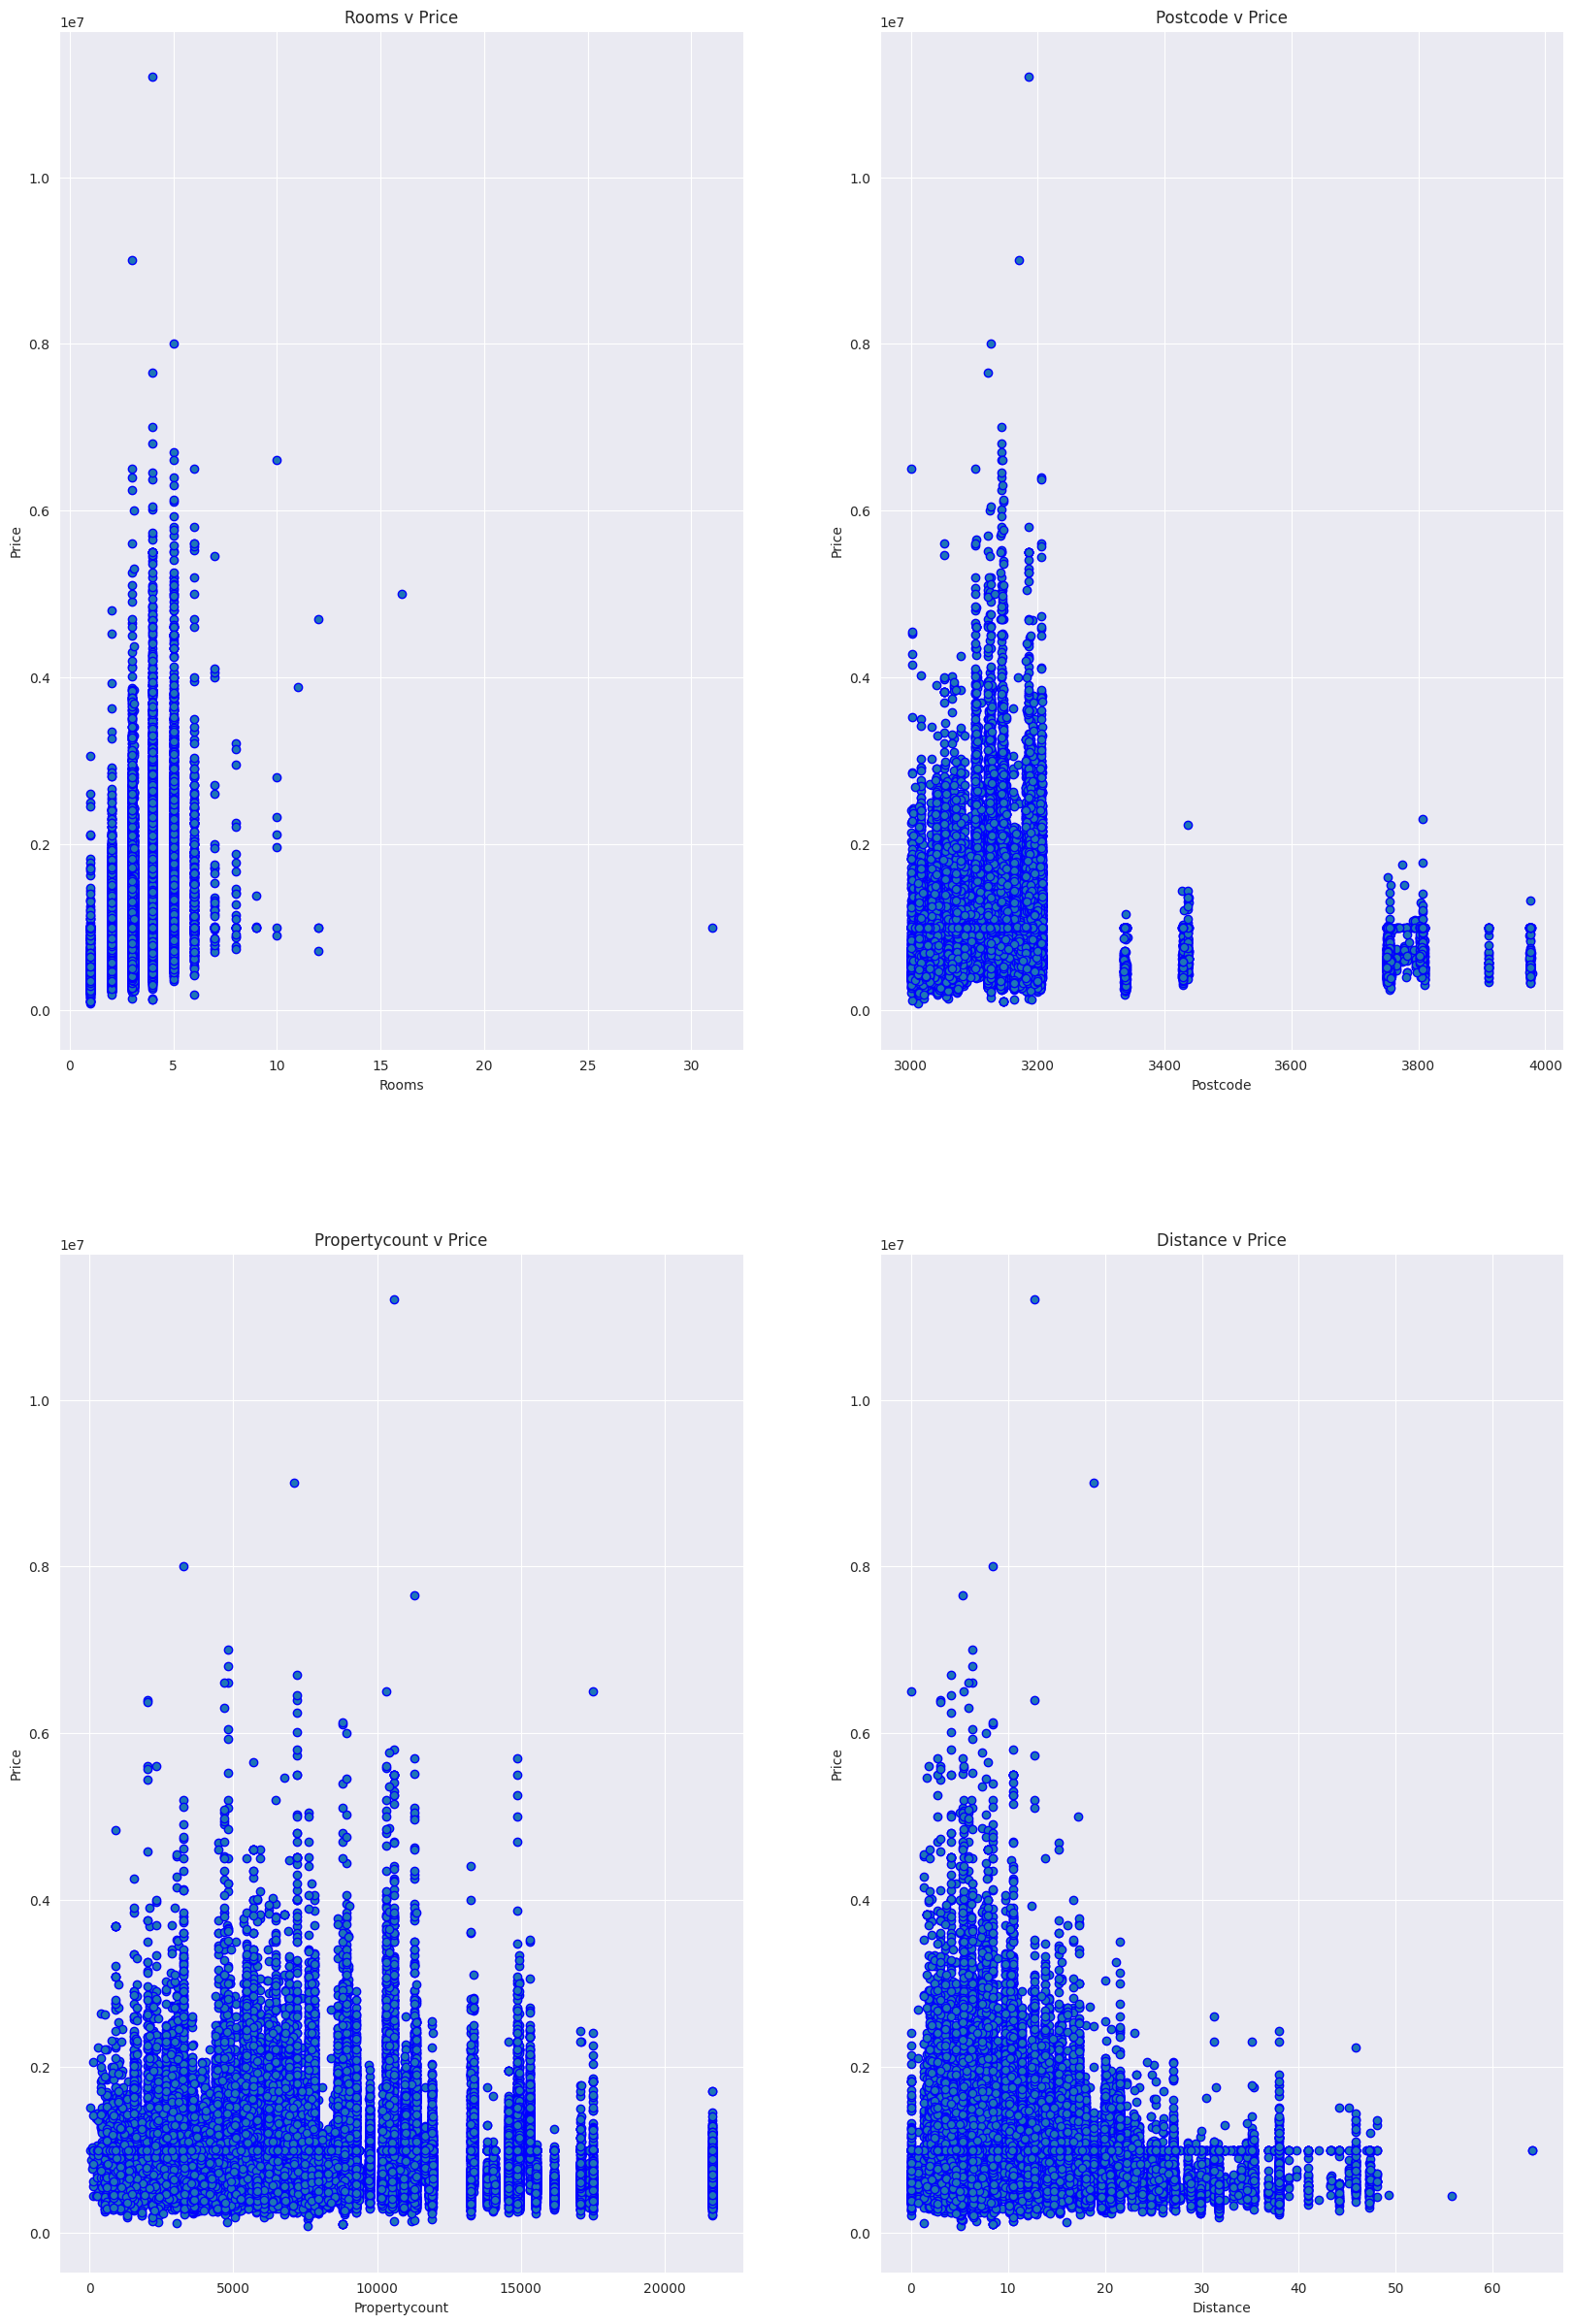

In [159]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (20,30))
# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df5, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')
# Plot [0,1]
axes[0,1].scatter(x = 'Postcode', y = 'Price', data = df5, edgecolor = 'b')
axes[0,1].set_xlabel('Postcode')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Postcode v Price')
# Plot [1,0]
axes[1,0].scatter(x = 'Propertycount', y = 'Price', data = df5, edgecolor = 'b')
axes[1,0].set_xlabel('Propertycount')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Propertycount v Price')
# Plot [1,1]
axes[1,1].scatter(x = 'Distance', y = 'Price', data = df5, edgecolor = 'b')
axes[1,1].set_xlabel('Distance')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Distance v Price')
plt.show()

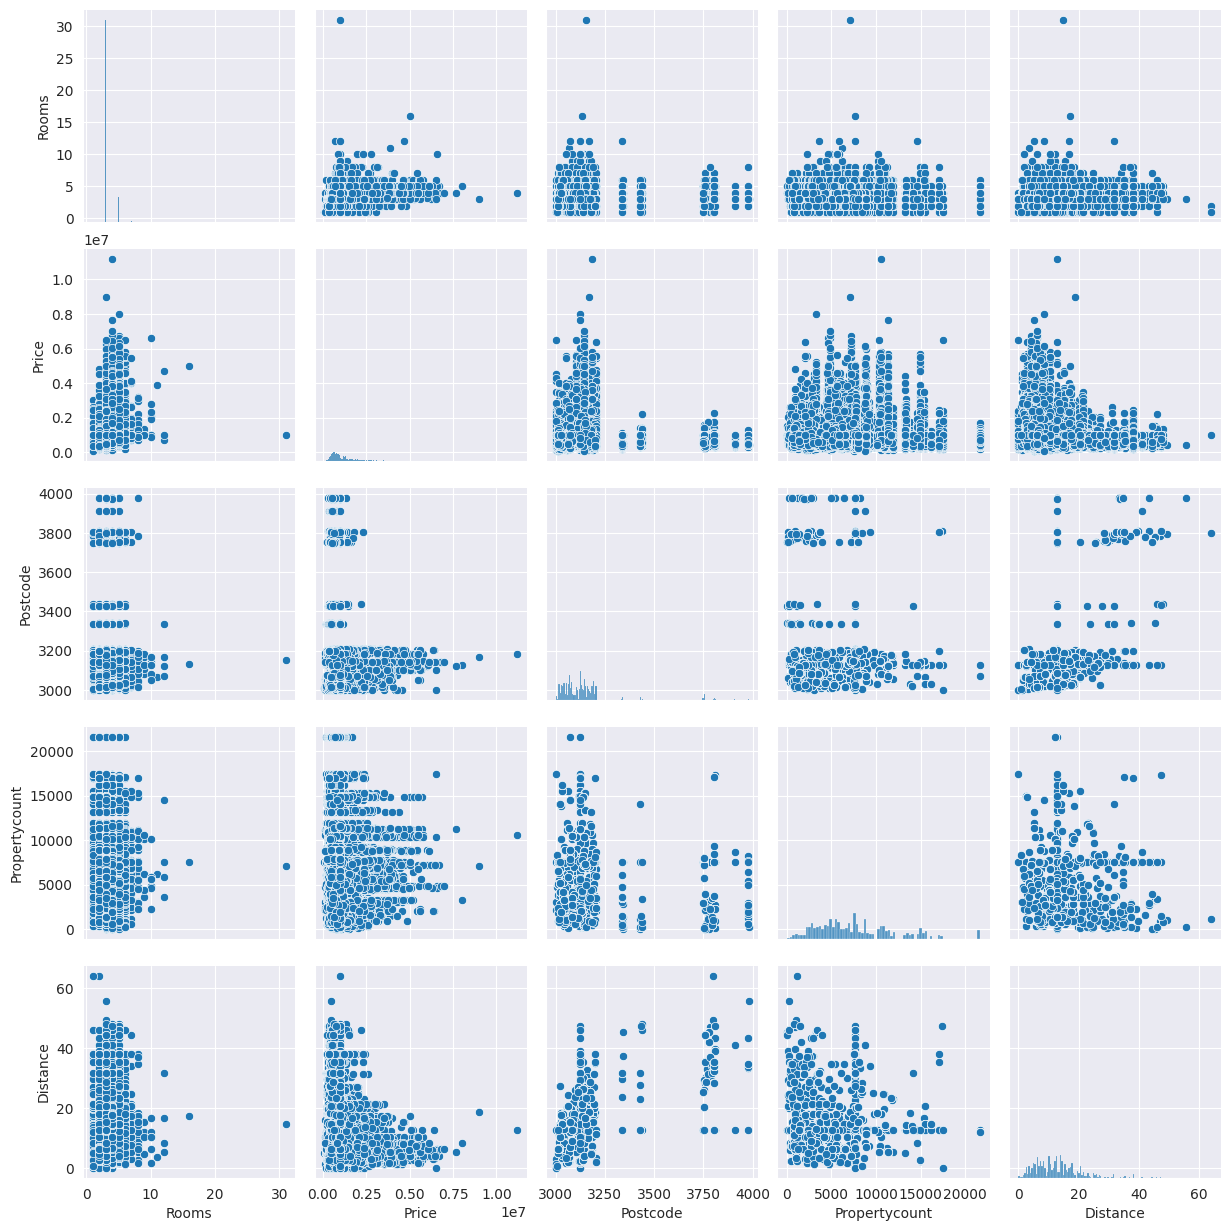

In [160]:
sns.pairplot(df5)

In [161]:
# Let's detect to numeric datas
df_numeric = df5.select_dtypes(include=['float64'])

Text(0.5, 1.0, 'Correlation')

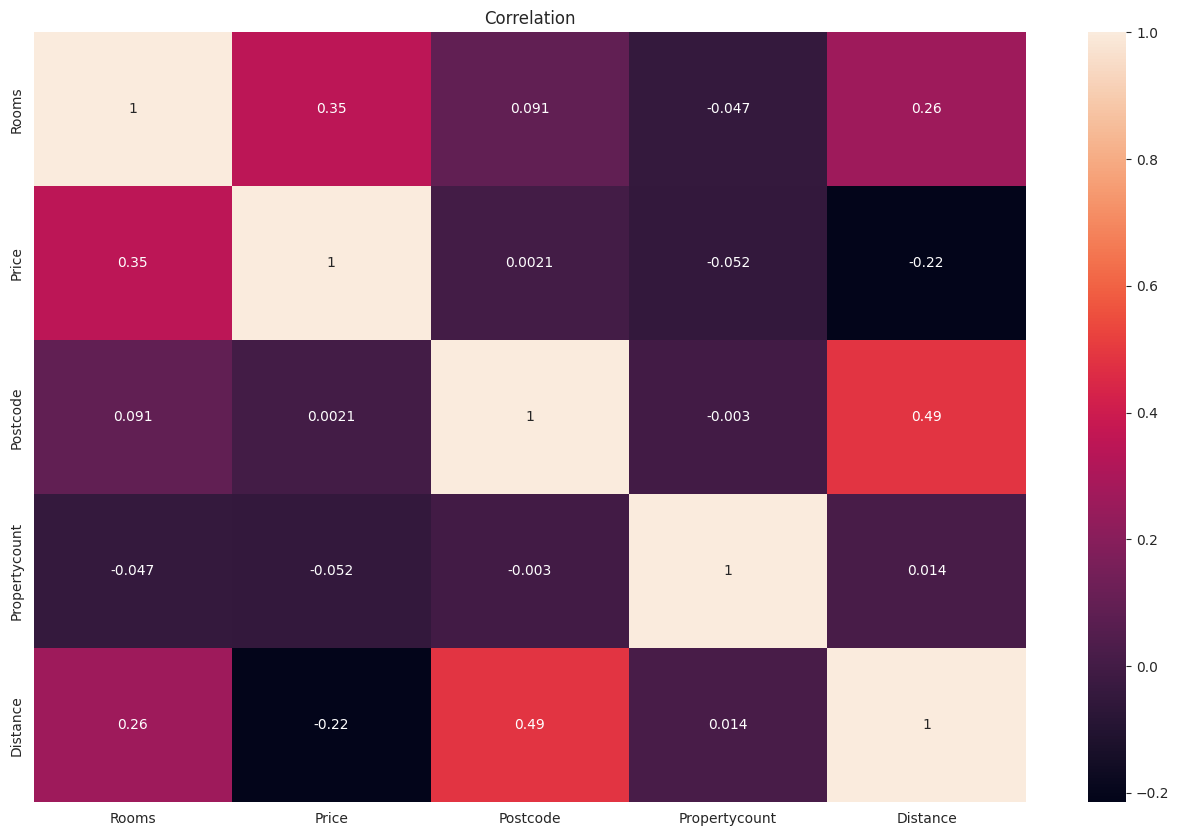

In [162]:
# Correlation Inspection
plt.figure(figsize=(16,10))
sns.heatmap(df_numeric.corr(), annot= True)
plt.title('Correlation')

### 8.Outliers 

In [163]:
df6 = df5.copy()

In [164]:
df_numeric = df6.select_dtypes(include=['float64'])

In [165]:
# To detect Outlier by IQR Method
for col in df_numeric:
    Q1 = df6[col].quantile(0.25)
    Q3 = df6[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Outlier Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Finding Outliers
    outliers = df6[(df6[col] < lower_bound) | (df6[col] > upper_bound)]
    print(f"Outliers ({col}): {outliers.shape[0]}")

Outliers (Rooms): 2567
Outliers (Price): 5715
Outliers (Postcode): 2320
Outliers (Propertycount): 1206
Outliers (Distance): 2057


In [166]:
print(numerical_features)

['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance']


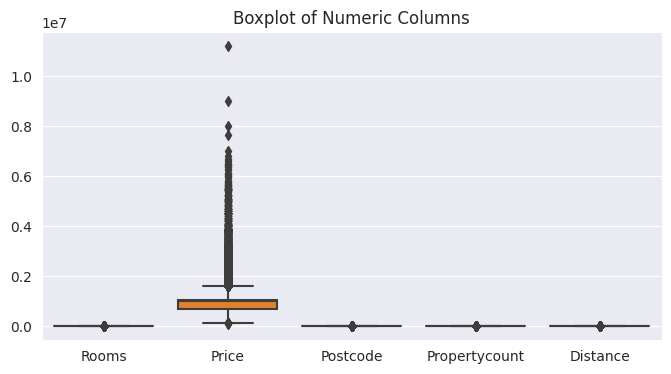

In [167]:
# To Detect with Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df6[numerical_features])
plt.title('Boxplot of Numeric Columns')
plt.show()

#### Note : Rounding outliers to bounding values

In [168]:
for col in df_numeric:
    df6[col] = df6[col].clip(lower=lower_bound, upper=upper_bound)

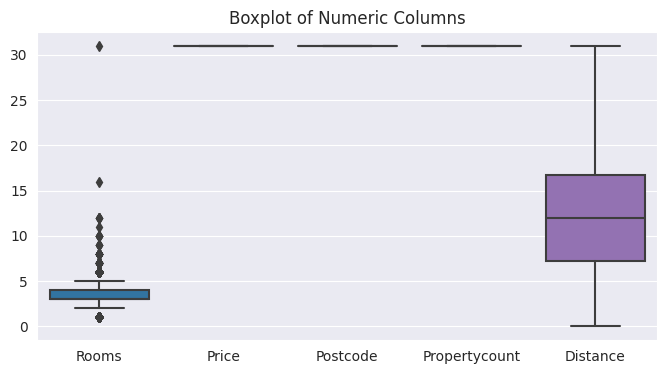

In [169]:
# To Detect with Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df6[numerical_features])
plt.title('Boxplot of Numeric Columns')
plt.show()

### 9.Optimization

In [170]:
df7 = df6.copy()

In [171]:
df7.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3.0,h,30.95,S,Jellis,1/04/2017,30.95,Northern Metropolitan,30.95,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3.0,h,30.95,S,Marshall,1/04/2017,30.95,Northern Metropolitan,30.95,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3.0,h,30.95,S,Nelson,1/04/2017,30.95,Northern Metropolitan,30.95,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3.0,h,30.95,S,Barry,24/03/2018,30.95,Western Metropolitan,30.95,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2.0,h,30.95,S,Nelson,1/04/2017,30.95,Western Metropolitan,30.95,10.4,Moonee Valley City Council


In [172]:
df_categorical = df7.select_dtypes(include=['category'])

In [173]:
label_encoder = LabelEncoder()
# for nominal datas
df7['Address_encoded'] = label_encoder.fit_transform(df7['Address'])
# for ordinal datas
for col in df_categorical:
    df7[col] = label_encoder.fit_transform(df7[col])

In [174]:
df7.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'Address_encoded'],
      dtype='object')

In [175]:
df7.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Address_encoded
0,0,49 Lithgow St,3.0,0,30.95,2,197,0,30.95,2,30.95,3.0,32,41212
1,0,59A Turner St,3.0,0,30.95,2,253,0,30.95,2,30.95,3.0,32,45570
2,0,119B Yarra St,3.0,0,30.95,2,284,0,30.95,2,30.95,3.0,32,7959
3,1,68 Vida St,3.0,0,30.95,2,28,57,30.95,6,30.95,7.5,22,48756
4,2,92 Clydesdale Rd,2.0,0,30.95,2,284,0,30.95,6,30.95,10.4,22,55612


In [176]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           63023 non-null  int64  
 1   Address          63023 non-null  object 
 2   Rooms            63023 non-null  float64
 3   Type             63023 non-null  int64  
 4   Price            63023 non-null  float64
 5   Method           63023 non-null  int64  
 6   SellerG          63023 non-null  int64  
 7   Date             63023 non-null  int64  
 8   Postcode         63023 non-null  float64
 9   Regionname       63023 non-null  int64  
 10  Propertycount    63023 non-null  float64
 11  Distance         63023 non-null  float64
 12  CouncilArea      63023 non-null  int64  
 13  Address_encoded  63023 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 6.7+ MB


In [177]:
df7 = df7.drop(columns=['Address'])

In [178]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           63023 non-null  int64  
 1   Rooms            63023 non-null  float64
 2   Type             63023 non-null  int64  
 3   Price            63023 non-null  float64
 4   Method           63023 non-null  int64  
 5   SellerG          63023 non-null  int64  
 6   Date             63023 non-null  int64  
 7   Postcode         63023 non-null  float64
 8   Regionname       63023 non-null  int64  
 9   Propertycount    63023 non-null  float64
 10  Distance         63023 non-null  float64
 11  CouncilArea      63023 non-null  int64  
 12  Address_encoded  63023 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.3 MB


In [179]:
numerical_cols = df7.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea',
       'Address_encoded'],
      dtype='object')


In [180]:
df7.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Address_encoded
0,0,3.0,0,30.95,2,197,0,30.95,2,30.95,3.0,32,41212
1,0,3.0,0,30.95,2,253,0,30.95,2,30.95,3.0,32,45570
2,0,3.0,0,30.95,2,284,0,30.95,2,30.95,3.0,32,7959
3,1,3.0,0,30.95,2,28,57,30.95,6,30.95,7.5,22,48756
4,2,2.0,0,30.95,2,284,0,30.95,6,30.95,10.4,22,55612


In [181]:
scaler = MinMaxScaler()
df7[numerical_cols] = scaler.fit_transform(df7[numerical_cols])

In [182]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           63023 non-null  float64
 1   Rooms            63023 non-null  float64
 2   Type             63023 non-null  float64
 3   Price            63023 non-null  float64
 4   Method           63023 non-null  float64
 5   SellerG          63023 non-null  float64
 6   Date             63023 non-null  float64
 7   Postcode         63023 non-null  float64
 8   Regionname       63023 non-null  float64
 9   Propertycount    63023 non-null  float64
 10  Distance         63023 non-null  float64
 11  CouncilArea      63023 non-null  float64
 12  Address_encoded  63023 non-null  float64
dtypes: float64(13)
memory usage: 6.3 MB


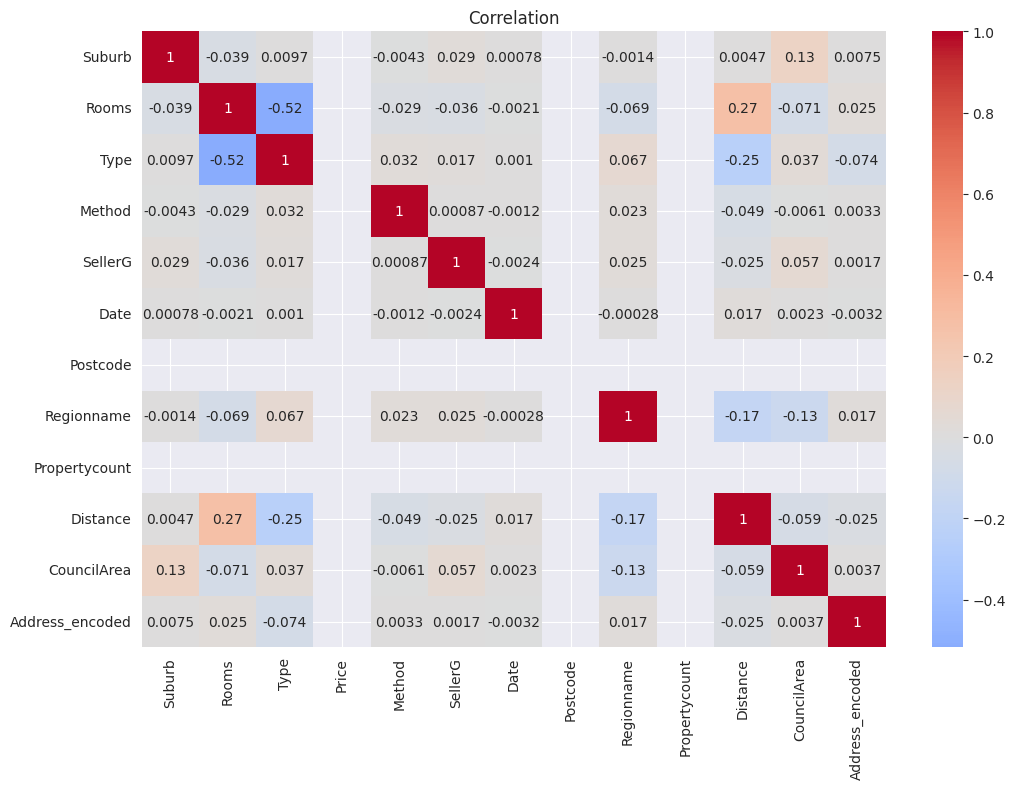

In [183]:
df7_numeric = df7.select_dtypes(include=['float64'])

corr = df7_numeric.corr()
price_column = 'Price'
corr_without_price = corr.drop(price_column)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_without_price, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation')
plt.show()

In [184]:
df7.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Address_encoded
0,0.000000,0.066778,0.0,0.0,0.25,0.419149,0.000000,0.0,0.285714,0.0,0.096931,0.969697,0.733662
1,0.000000,0.066778,0.0,0.0,0.25,0.538298,0.000000,0.0,0.285714,0.0,0.096931,0.969697,0.811244
2,0.000000,0.066778,0.0,0.0,0.25,0.604255,0.000000,0.0,0.285714,0.0,0.096931,0.969697,0.141687
3,0.002639,0.066778,0.0,0.0,0.25,0.059574,0.513514,0.0,0.857143,0.0,0.242326,0.666667,0.867961
4,0.005277,0.033389,0.0,0.0,0.25,0.604255,0.000000,0.0,0.857143,0.0,0.336026,0.666667,0.990013


## Conclusion

#### This dataset contains various information about the characteristics of houses in Melbourne. It can be used especially for price estimation, location analysis and market trends.

For example:
* Variables like Suburb and Distance allow you to examine the effect of location on house prices.
* Numerical variables like Rooms, Propertycount and Price can be used to perform value analysis based on house features.
* Categorical variables like Method, SellerG and CouncilArea allow you to understand the sales methods and seller information of houses.
* These columns allow you to make important inferences about the real estate market in Melbourne.